<a href="https://colab.research.google.com/github/Surya0907/Ai-Bharata-Internship/blob/main/Cat_v_s_Dog_Classification_Starter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-02-26 11:02:17--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.39.61.47, 2600:1407:3c00:a86::317f, 2600:1407:3c00:a8f::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.39.61.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   164MB/s    in 4.4s    

2023-02-26 11:02:22 (178 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip
!ls


Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  
  inflating: PetImages/Dog/5524.jpg  

In [3]:
!pip install keras
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras import preprocessing
from keras_preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [6]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/2721.jpg 1


In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0    PetImages/Cat/150.jpg      0
1  PetImages/Dog/12122.jpg      1
2  PetImages/Dog/10059.jpg      1
3    PetImages/Dog/592.jpg      1
4    PetImages/Cat/418.jpg      0

In [8]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [9]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

In [10]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

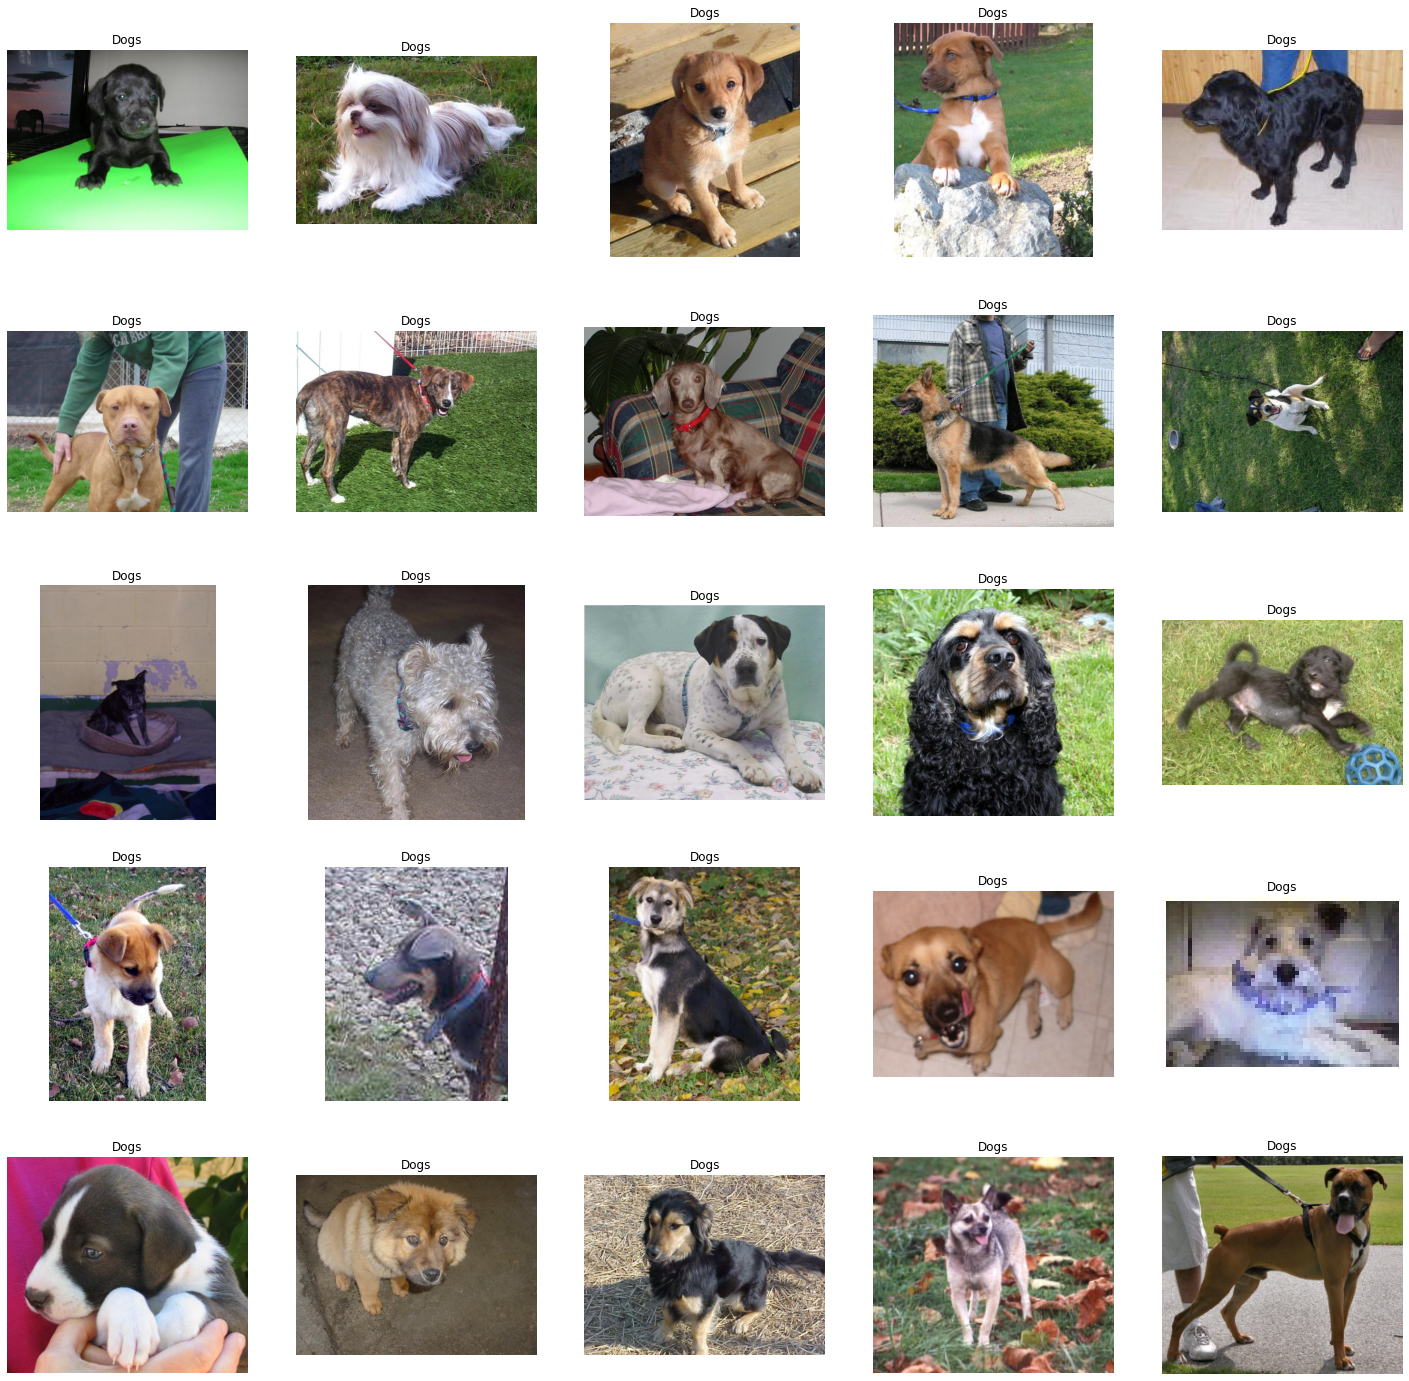

In [11]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

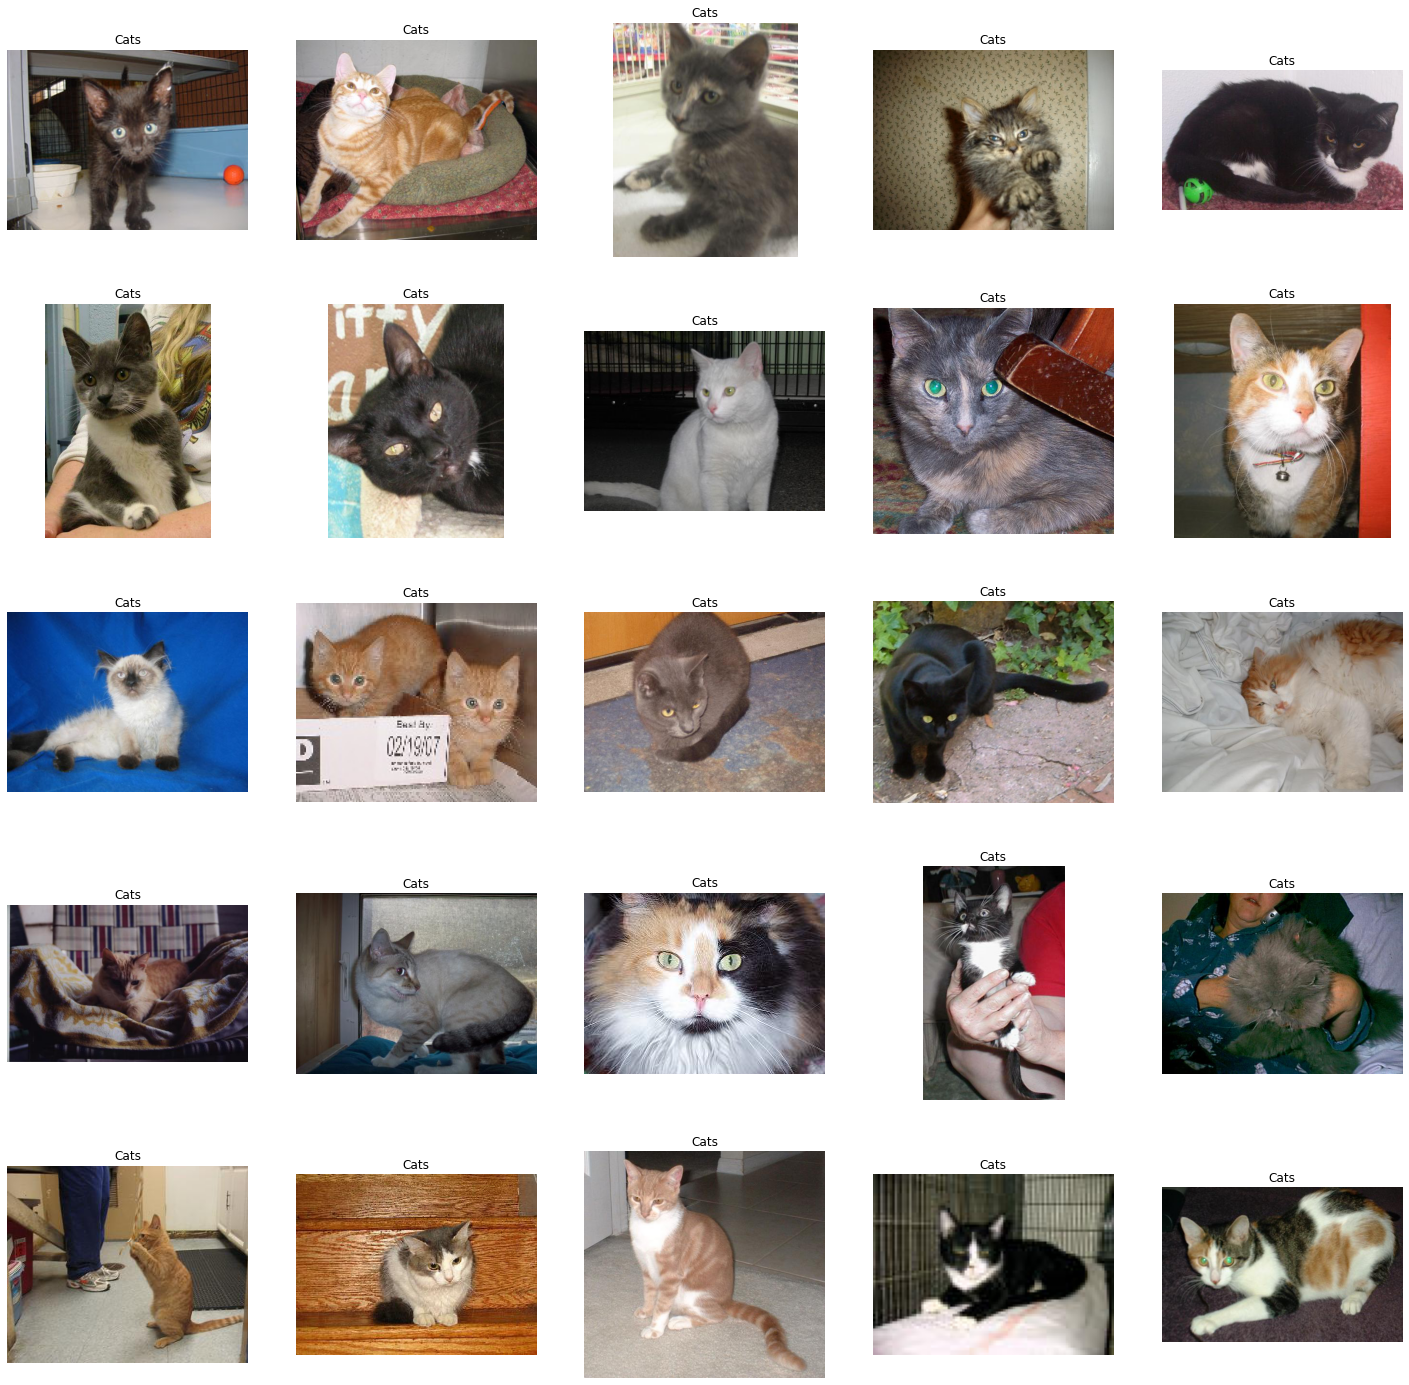

In [12]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

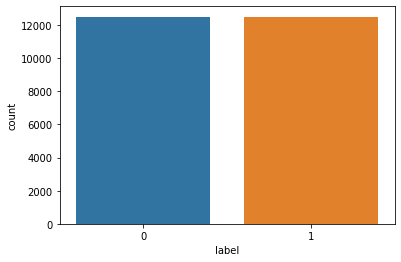

In [13]:
import seaborn as sns
sns.countplot(df['label'])

In [14]:
df['label'] = df['label'].astype('str')
df.head()


images label
0    PetImages/Cat/150.jpg     0
1  PetImages/Dog/12122.jpg     1
2  PetImages/Dog/10059.jpg     1
3    PetImages/Dog/592.jpg     1
4    PetImages/Cat/418.jpg     0

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  
    rotation_range = 40, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
]) 


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [19]:
model.save('cat_vs_dog_classification.h5')

In [20]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 168s 4s/step - loss: 0.7018 - accuracy: 0.5399 - val_loss: 0.6591 - val_accuracy: 0.6076
Epoch 2/10
40/40 [==============================] - 144s 4s/step - loss: 0.6471 - accuracy: 0.6201 - val_loss: 0.6115 - val_accuracy: 0.6610
Epoch 3/10
40/40 [==============================] - 144s 4s/step - loss: 0.5998 - accuracy: 0.6817 - val_loss: 0.5668 - val_accuracy: 0.6992
Epoch 4/10
40/40 [==============================] - 158s 4s/step - loss: 0.5881 - accuracy: 0.6905 - val_loss: 0.5285 - val_accuracy: 0.7310
Epoch 5/10
40/40 [==============================] - 147s 4s/step - loss: 0.5458 - accuracy: 0.7222 - val_loss: 0.5001 - val_accuracy: 0.7512
Epoch 6/10
40/40 [==============================] - 144s 4s/step - loss: 0.5233 - accuracy: 0.7389 - val_loss: 0.4807 - val_accuracy: 0.7662
Epoch 7/10
40/40 [==============================] - 148s 4s/step - loss: 0.4924 - accuracy: 0.7628 - val_loss: 0.4621 - val_accuracy: 0.7794
Epoch 8/10
40

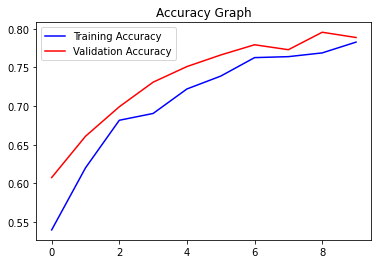

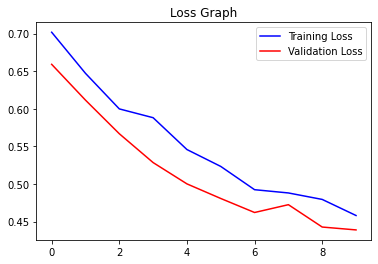

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph') 
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [22]:
print(len(train))

19998


In [23]:
print(len(test))

5000


In [24]:
train

images label
23290   PetImages/Cat/1597.jpg     0
17783   PetImages/Cat/1992.jpg     0
1021    PetImages/Dog/4173.jpg     1
12646   PetImages/Cat/4052.jpg     0
1534    PetImages/Dog/4037.jpg     1
...                        ...   ...
21579  PetImages/Dog/10493.jpg     1
5391    PetImages/Dog/5062.jpg     1
861    PetImages/Cat/10107.jpg     0
15797   PetImages/Cat/3577.jpg     0
23658   PetImages/Cat/1222.jpg     0

[19998 rows x 2 columns]

In [25]:
test

images label
6869    PetImages/Dog/9335.jpg     1
22914    PetImages/Dog/886.jpg     1
9670   PetImages/Dog/11116.jpg     1
13640   PetImages/Cat/5840.jpg     0
23341   PetImages/Dog/1672.jpg     1
...                        ...   ...
8671    PetImages/Cat/1299.jpg     0
11841   PetImages/Cat/5948.jpg     0
4014    PetImages/Dog/6748.jpg     1
16240   PetImages/Dog/4817.jpg     1
696     PetImages/Cat/9436.jpg     0

[5000 rows x 2 columns]

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [27]:
image_path = "9994.jpg"
img = load_img(image_path,target_size=(128,128))
img = np.array(img)
img = img/255.0
img = img.reshape(1,128,128,3)
pred = model.predict(img)
print(pred[0])

1/1 [==============================] - 0s 191ms/step
[0.7203991]


In [28]:
img.shape

(1, 128, 128, 3)

In [29]:
if pred[0] > 0.5:
  label = 'Dog'
else:
  label = 'Cat'
print(label)

Dog


In [30]:
#Using VGG16 for training the model

In [31]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [52]:
from keras import layers,models
model1 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(50,activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [34]:
model1.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy'])

In [35]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
total_train = train_df.shape[0]
total_test = test_df.shape[0]

In [36]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    x_col='images',
    y_col='label',
    class_mode='binary',
    target_size=(224,224),
    batch_size=16
)

Found 22498 validated image filenames belonging to 2 classes.


In [37]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    test_df,
    x_col='images',
    y_col='label',
    class_mode = 'binary',
    target_size = (224,224),
    batch_size = 16
)

Found 2500 validated image filenames belonging to 2 classes.


In [38]:
history = model1.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=total_test//16,
    steps_per_epoch=total_train//16)

Epoch 1/5
1406/1406 [==============================] - 370s 261ms/step - loss: 0.2550 - accuracy: 0.8898 - val_loss: 0.1979 - val_accuracy: 0.9215
Epoch 2/5
1406/1406 [==============================] - 368s 261ms/step - loss: 0.1957 - accuracy: 0.9194 - val_loss: 0.1882 - val_accuracy: 0.9267
Epoch 3/5
1406/1406 [==============================] - 373s 265ms/step - loss: 0.1779 - accuracy: 0.9246 - val_loss: 0.1781 - val_accuracy: 0.9199
Epoch 4/5
1406/1406 [==============================] - 372s 264ms/step - loss: 0.1758 - accuracy: 0.9254 - val_loss: 0.1606 - val_accuracy: 0.9335
Epoch 5/5
1406/1406 [==============================] - 343s 244ms/step - loss: 0.1640 - accuracy: 0.9301 - val_loss: 0.1810 - val_accuracy: 0.9199


In [39]:
loss,accuracy = model1.evaluate_generator(validation_generator,total_test//16,workers=12)
print("Test:accuracy=%f ; loss = %f " % (accuracy,loss))

Test:accuracy=0.919471 ; loss = 0.181420 


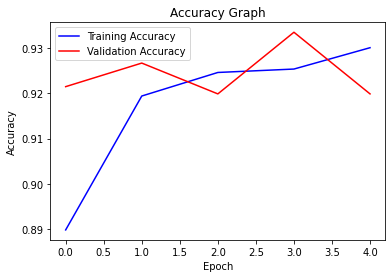

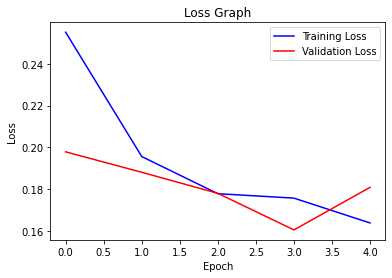

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [41]:
image_path = "100.jpg"
img = load_img(image_path,target_size=(224,224))
img = np.array(img)
img = img/255.0
img = img.reshape(1,224,224,3)
pred = model1.predict(img)
print(pred[0])

1/1 [==============================] - 1s 789ms/step
[1.2835115e-07]


In [42]:
img.shape

(1, 224, 224, 3)

In [43]:
if pred[0] > 0.5:
  label = 'Dog'
else:
  label = 'Cat'
print(label)

Cat


In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image,display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

91186/91186 [==============================] - 0s 2us/step


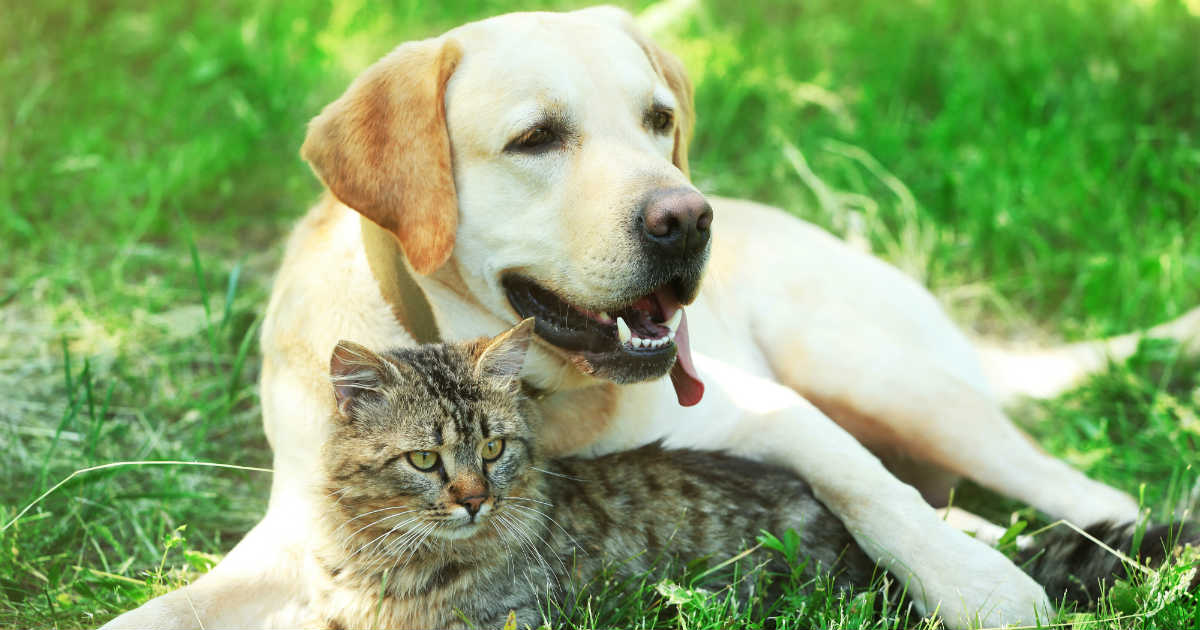

In [45]:
model.builder = keras.applications.vgg16.VGG16
img_size = (224,224)
preprocess_input = keras.applications.vgg16.preprocess_input
decode_predictions = keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_pool"
img_path = keras.utils.get_file(
    "cats_and_dogs.jpg",
    "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-together-cover.jpg"
)

display(Image(img_path))

In [46]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [47]:
img_array = preprocess_input(get_img_array(img_path,size=img_size))
model = model.builder(weights='imagenet')
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=2)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02091831', 'Saluki', 0.22122654), ('n02091134', 'whippet', 0.16059509)]


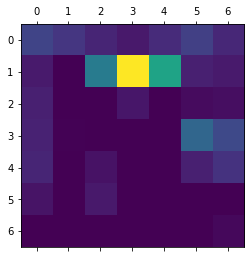

In [48]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

plt.matshow(heatmap)
plt.show()

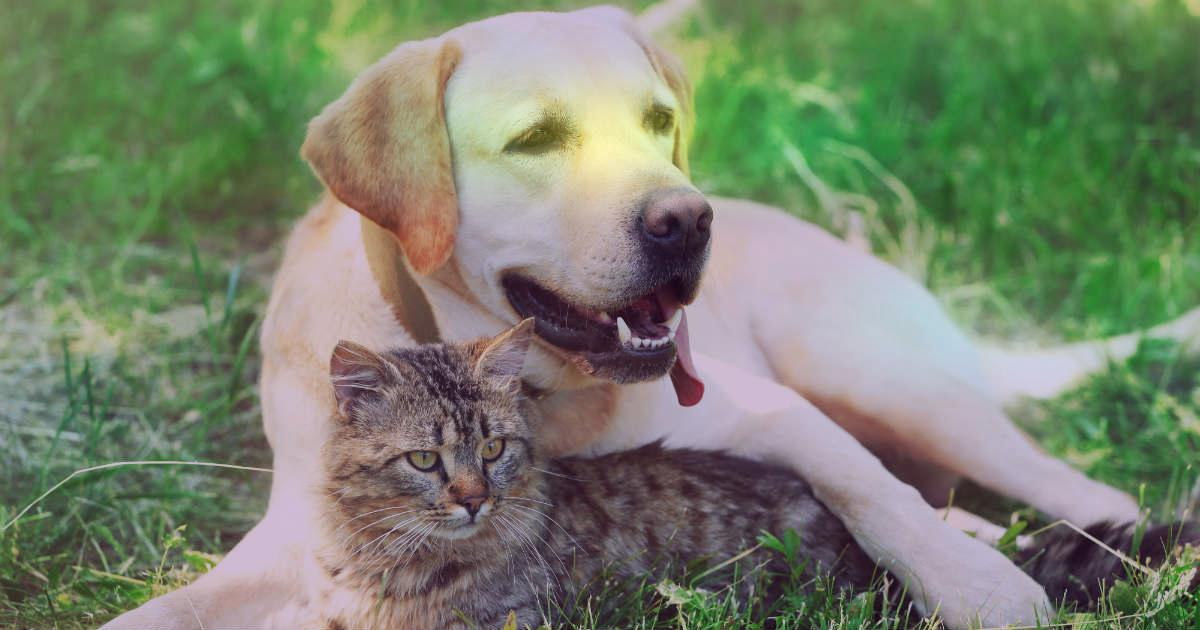

In [49]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("viridis")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

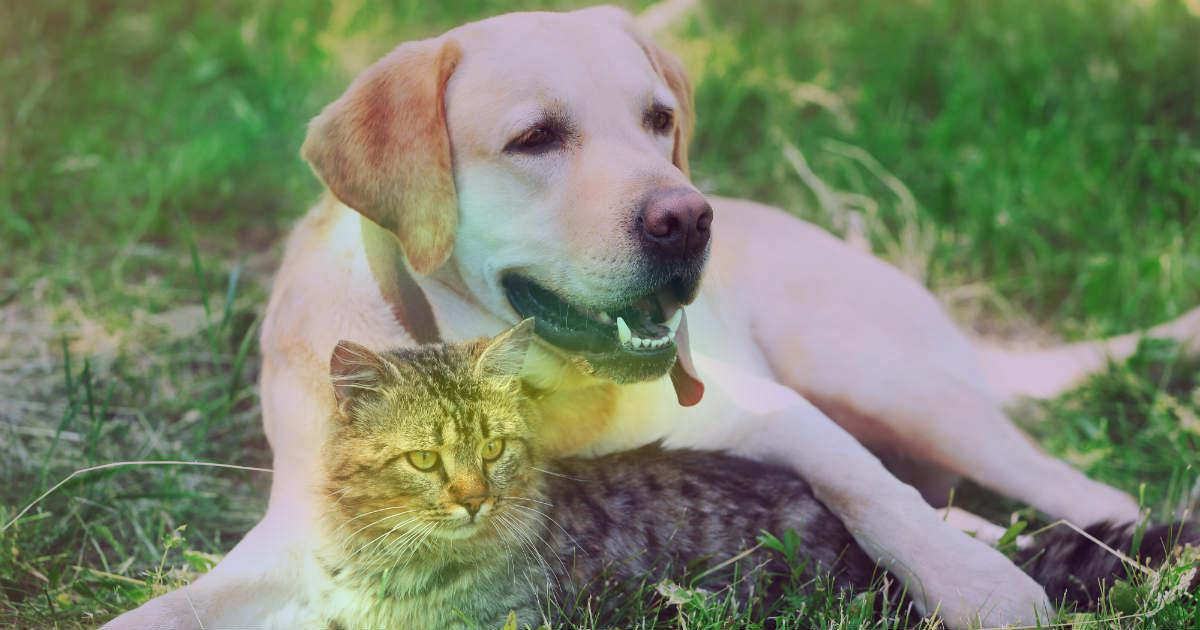

In [50]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name,pred_index=260) 
save_and_display_gradcam(img_path,heatmap)

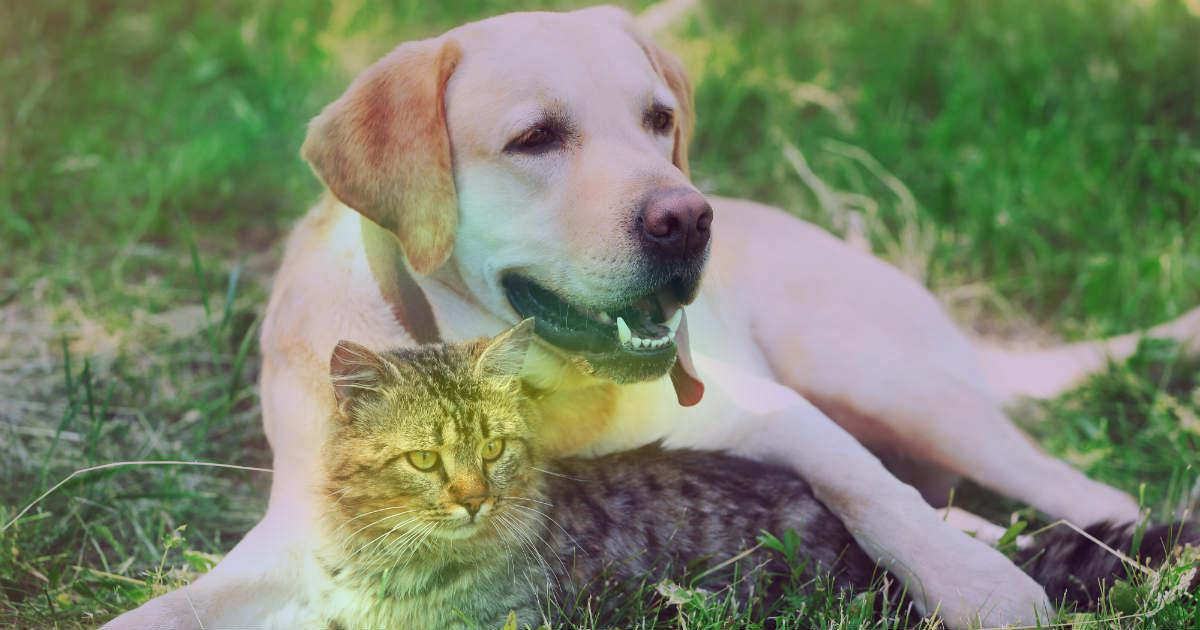

In [54]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name,pred_index=260) 
save_and_display_gradcam(img_path,heatmap)